In [1]:
!ls

CHA_activities_2016-2020.csv  Internal EDA.ipynb
CHA_activities_2016-2020.xlsx datathonEDA.twb


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

internal = pd.read_csv('CHA_activities_2016-2020.csv')
internal.head()

/Users/davsha/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,HubRandomID,Hub_ActivityID,ActivityDate,ProgrammeID,ChildParticipants,AdultParticipants,DSS_ClientParticipants,ReferralParticipants,EngagedCount,...,ProgrammeID.1,ProgrammeName,ProgrammeCategoryID,ShortName,ServiceTypeID,ProgrammeCategoryID.1,CategoryName,Status.1,StartDate,ShortName.1
0,0,15994,259,4/3/19,50,11,7,18,0,0,...,50,Playgroups and Early Years,1,Playgroups,4,1,Programmed Activities,C,1/1/10,PROG
1,1,15994,260,25/2/19,50,12,8,20,0,0,...,50,Playgroups and Early Years,1,Playgroups,4,1,Programmed Activities,C,1/1/10,PROG
2,2,15994,261,11/3/19,50,0,0,0,0,0,...,50,Playgroups and Early Years,1,Playgroups,4,1,Programmed Activities,C,1/1/10,PROG
3,3,15994,262,18/3/19,50,12,8,20,0,0,...,50,Playgroups and Early Years,1,Playgroups,4,1,Programmed Activities,C,1/1/10,PROG
4,4,15994,263,4/2/19,50,10,6,16,0,0,...,50,Playgroups and Early Years,1,Playgroups,4,1,Programmed Activities,C,1/1/10,PROG


In [302]:
pd.set_option('max_columns', 180)
pd.set_option('max_rows', 10000)
pd.set_option('max_colwidth', 1000)

In [7]:
len(internal['HubRandomID'].unique())

80

What does the 'typical hub' look like in terms of 
- engagement
- diversity of programs
- activities for children and adults

Normalise this between hubs. Is number of participants a good enough metric? Get distibution of engagement

How have the above trended over time?

Manual clustering - and seeing how hubs are indexed compared to the population.

Categorise into high/low




In [9]:
internal.describe(include = 'all')

,Unnamed: 0,HubRandomID,Hub_ActivityID,ActivityDate,ProgrammeID,ChildParticipants,AdultParticipants,DSS_ClientParticipants,ReferralParticipants,EngagedCount,LastModifiedBy,LastModifiedDateTime,StartTime,EndTime,ExternalVolunteers,HubVolunteers,SchoolVolunteers,Status,LastModifiedBy.1,LastModifiedDateTime.1,IsActive,ProgrammeID.1,ProgrammeName,ProgrammeCategoryID,ShortName,ServiceTypeID,ProgrammeCategoryID.1,CategoryName,Status.1,StartDate,ShortName.1
count,163150.000000,163150.000000,163150.000000,163150,163150.000000,163150.000000,163150.000000,163150.0,163150.000000,163150.0,163150,163150,27134,27134,163150.000000,163150.000000,163150.000000,163150,163150,163150,163150.000000,163150.000000,163150,163150.000000,163150,163150.000000,163150.000000,163150,163150,163150,163150
unique,NaN,NaN,NaN,430,NaN,NaN,NaN,508.0,NaN,NaN,3,10562,78,98,NaN,NaN,NaN,6,3,10,NaN,NaN,29,NaN,29,NaN,NaN,4,1,1,4
top,NaN,NaN,NaN,2/10/17,NaN,NaN,NaN,0.0,NaN,NaN,dbo,41:12.8,9:00:00,11:00:00,NaN,NaN,NaN,Closed,unisuper\SheelaN,23:39.9,NaN,NaN,Parent engagement,NaN,Parents,NaN,NaN,Programmed Activities,C,1/1/10,PROG
freq,NaN,NaN,NaN,1079,NaN,NaN,NaN,84598.0,NaN,NaN,147448,119337,7274,2926,NaN,NaN,NaN,120045,151819,80335,NaN,NaN,27936,NaN,27936,NaN,NaN,88458,163150,163150,88458
mean,81574.500000,15189.556200,520290.987882,NaN,53.758388,5.988685,3.782654,NaN,1.006184,0.0,NaN,NaN,NaN,NaN,0.062679,0.053472,0.043898,NaN,NaN,NaN,0.952718,53.758388,NaN,1.793325,NaN,14.966601,1.793325,NaN,NaN,NaN,NaN
std,47097.492546,2971.128235,179883.068454,NaN,7.080064,29.027974,15.705990,NaN,11.856494,0.0,NaN,NaN,NaN,NaN,1.829064,0.497211,2.901615,NaN,NaN,NaN,0.212241,7.080064,NaN,0.919536,NaN,36.204133,0.919536,NaN,NaN,NaN,NaN
min,0.000000,10011.000000,259.000000,NaN,45.000000,0.000000,0.000000,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,45.000000,NaN,1.000000,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN
25%,40787.250000,12394.000000,534350.250000,NaN,48.000000,0.000000,0.000000,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000,48.000000,NaN,1.000000,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN
50%,81574.500000,14935.000000,575137.500000,NaN,50.000000,0.000000,0.000000,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000,50.000000,NaN,1.000000,NaN,4.000000,1.000000,NaN,NaN,NaN,NaN
75%,122361.750000,18154.000000,616184.750000,NaN,59.000000,2.000000,4.000000,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000,59.000000,NaN,3.000000,NaN,10.000000,3.000000,NaN,NaN,NaN,NaN


correlations between 
- number of activities overall and number of participants - ratio?
- number of different kinds of activities and participants

indexing - compare to population

indexing over time - do any behave differently?


attributes - who are they  
behaviours - what have they done, what will they do?  
recommendations - what should they do, what should we do?  

developers.google.com/machine-learning/guides/good-data-analysis
validation
evaluation 
description

In [10]:
internal['activity_date'] = pd.to_datetime(internal['ActivityDate'])
internal['activity_date'].value_counts()

2017-11-27    1079
2017-11-20    1079
2017-02-10    1079
2017-09-10    1079
2017-12-18    1079
2017-06-11    1079
2017-11-13    1079
2017-10-23    1079
2017-04-12    1079
2017-10-16    1079
2017-11-12    1079
2017-10-30    1079
2018-12-11    1077
2018-11-26    1077
2018-05-11    1077
2018-03-12    1077
2018-10-29    1077
2018-10-12    1077
2018-11-19    1077
2018-10-22    1077
2018-10-15    1076
2018-11-06    1066
2018-06-25    1066
2018-04-06    1066
2018-05-28    1066
2018-05-21    1066
2018-04-30    1066
2018-05-14    1066
2018-07-05    1066
2018-06-18    1066
2018-05-03    1018
2018-02-19    1018
2018-05-02    1018
2018-12-03    1018
2018-02-26    1018
2018-12-02    1018
2018-03-26    1018
2018-01-29    1018
2018-03-19    1018
2019-06-14    1017
2019-10-05    1017
2019-03-05    1016
2019-06-21    1010
2019-05-31    1009
2019-05-24    1006
2019-05-17    1005
2019-07-06    1002
2019-06-28     998
2017-07-31     997
2017-08-21     997
2017-07-08     997
2017-04-09     997
2017-07-17  

In [13]:
internal = internal[['HubRandomID', 'Hub_ActivityID', 'ActivityDate', 
          'activity_date',  'ProgrammeCategoryID', 'CategoryName', 'ProgrammeID', 'ProgrammeName', 'ChildParticipants', 'AdultParticipants']]

internal

,HubRandomID,Hub_ActivityID,ActivityDate,activity_date,ProgrammeCategoryID,CategoryName,ProgrammeID,ProgrammeName,ChildParticipants,AdultParticipants
0,15994,259,4/3/19,2019-04-03,1,Programmed Activities,50,Playgroups and Early Years,11,7
1,15994,260,25/2/19,2019-02-25,1,Programmed Activities,50,Playgroups and Early Years,12,8
2,15994,261,11/3/19,2019-11-03,1,Programmed Activities,50,Playgroups and Early Years,0,0
3,15994,262,18/3/19,2019-03-18,1,Programmed Activities,50,Playgroups and Early Years,12,8
4,15994,263,4/2/19,2019-04-02,1,Programmed Activities,50,Playgroups and Early Years,10,6
...,...,...,...,...,...,...,...,...,...,...
163145,12736,670061,14/11/19,2019-11-14,1,Programmed Activities,47,English Classes & Conversation Programs,10,10
163146,12736,670062,5/12/19,2019-05-12,1,Programmed Activities,47,English Classes & Conversation Programs,7,8
163147,12736,670063,12/12/19,2019-12-12,1,Programmed Activities,47,English Classes & Conversation Programs,10,10
163148,12736,670064,19/12/19,2019-12-19,1,Programmed Activities,47,English Classes & Conversation Programs,0,0


In [14]:
dates_sorted = internal.sort_values('activity_date')

In [15]:
dates_sorted['time_delta'] = dates_sorted['activity_date'] - dates_sorted['activity_date'].shift()
dates_sorted['time_delta'] = dates_sorted['time_delta'].astype('timedelta64[D]')

dates_sorted['time_delta'].unique()

array([nan,  0.,  6., 19.,  9., 10.,  7.,  4.,  3., 11., 14.,  8., 17.,
       18.,  5., 13., 12.,  1., 21.,  2.])

In [ ]:
-- sum activities in a hub / number of months

internal.pivot

## Hub activities

In [16]:
activities = internal.pivot_table(values='Hub_ActivityID', index = ['activity_date', 'HubRandomID'], aggfunc=len)
activities_unstacked = activities.unstack().fillna(0)
#activities_unstacked.columns

activities_unstacked.droplevel(0, axis=1).columns



# top_products_by_days_prior = pd.DataFrame(df_agg['product_id'].groupby(level=0, group_keys=False).nlargest(10)).reset_index()
# top_products_by_days_prior.rename({'product_id' : 'product_count'}, axis = 1, inplace=True)

Int64Index([10011, 10549, 10813, 10833, 10884, 10932, 11098, 11188, 11227,
            11332, 11419, 11491, 11579, 11662, 11818, 11833, 12369, 12394,
            12420, 12736, 12756, 13024, 13253, 13506, 13516, 13590, 13748,
            13765, 13876, 13958, 13966, 14082, 14226, 14457, 14819, 14915,
            14935, 14989, 15120, 15301, 15669, 15830, 15857, 15978, 15994,
            16050, 16315, 16406, 16407, 16512, 16538, 16724, 16912, 16964,
            16999, 17153, 17182, 17184, 17319, 17416, 17534, 17600, 17604,
            18139, 18154, 18200, 18315, 18335, 18506, 18747, 18764, 18812,
            18922, 19277, 19483, 19616, 19635, 19650, 19713, 19871],
           dtype='int64', name='HubRandomID')

In [17]:
internal[internal['HubRandomID'] == 10011].sort_values('activity_date')

,HubRandomID,Hub_ActivityID,ActivityDate,activity_date,ProgrammeCategoryID,CategoryName,ProgrammeID,ProgrammeName,ChildParticipants,AdultParticipants
75636,10011,569199,1/5/17,2017-01-05,3,Service Referrals,68,Preschool,0,0
75437,10011,569000,1/5/17,2017-01-05,1,Programmed Activities,49,Parent engagement,0,6
75318,10011,568881,1/5/17,2017-01-05,1,Programmed Activities,50,Playgroups and Early Years,4,4
75495,10011,569058,1/5/17,2017-01-05,3,Service Referrals,69,Number of families participating in the Hub,0,0
75149,10011,568712,1/5/17,2017-01-05,3,Service Referrals,60,Education and training,0,0
75064,10011,568627,1/5/17,2017-01-05,1,Programmed Activities,49,Parent engagement,0,0
75031,10011,568594,1/5/17,2017-01-05,1,Programmed Activities,49,Parent engagement,0,6
94045,10011,587608,2/10/17,2017-02-10,1,Programmed Activities,49,Parent engagement,0,0
94074,10011,587637,2/10/17,2017-02-10,1,Programmed Activities,49,Parent engagement,0,0
94094,10011,587657,2/10/17,2017-02-10,1,Programmed Activities,49,Parent engagement,0,0


In [35]:
activities_unstacked.droplevel(0, axis=1)

HubRandomID,10011,10549,10813,10833,10884,10932,11098,11188,11227,11332,11419,11491,11579,11662,11818,11833,12369,12394,12420,12736,12756,13024,13253,13506,13516,13590,13748,13765,13876,13958,13966,14082,14226,14457,14819,14915,14935,14989,15120,15301,15669,15830,15857,15978,15994,16050,16315,16406,16407,16512,16538,16724,16912,16964,16999,17153,17182,17184,17319,17416,17534,17600,17604,18139,18154,18200,18315,18335,18506,18747,18764,18812,18922,19277,19483,19616,19635,19650,19713,19871
activity_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-02,0.0,0.0,0.0,21.0,19.0,0.0,20.0,11.0,18.0,20.0,20.0,14.0,0.0,0.0,19.0,0.0,20.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,27.0,23.0,0.0,0.0,0.0,0.0,16.0,24.0,15.0,17.0,18.0,0.0,19.0,0.0,16.0,0.0,22.0,0.0,0.0,0.0,14.0,0.0,0.0,13.0,8.0,0.0,12.0,7.0,0.0,0.0,12.0,0.0,0.0,12.0,0.0,0.0,20.0,0.0,0.0,0.0,13.0,0.0,19.0,15.0,0.0,0.0,27.0,0.0,0.0,28.0,28.0,21.0,20.0,0.0,24.0,0.0
2016-01-08,0.0,0.0,0.0,21.0,19.0,0.0,25.0,9.0,15.0,23.0,25.0,20.0,0.0,0.0,23.0,0.0,21.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,28.0,31.0,0.0,0.0,0.0,0.0,17.0,27.0,24.0,18.0,17.0,0.0,21.0,0.0,25.0,0.0,28.0,0.0,0.0,0.0,18.0,0.0,0.0,13.0,13.0,0.0,19.0,10.0,0.0,0.0,15.0,0.0,0.0,11.0,0.0,0.0,21.0,0.0,0.0,0.0,13.0,0.0,22.0,14.0,0.0,0.0,18.0,10.0,0.0,36.0,29.0,19.0,20.0,0.0,29.0,0.0
2016-01-27,0.0,0.0,0.0,21.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0
2016-02-05,0.0,0.0,0.0,17.0,17.0,0.0,32.0,18.0,14.0,21.0,15.0,17.0,0.0,0.0,25.0,0.0,27.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,30.0,26.0,0.0,0.0,0.0,0.0,21.0,29.0,24.0,21.0,22.0,0.0,20.0,0.0,23.0,0.0,28.0,0.0,0.0,0.0,13.0,0.0,0.0,13.0,15.0,0.0,19.0,10.0,0.0,0.0,11.0,0.0,0.0,17.0,0.0,0.0,20.0,0.0,0.0,0.0,13.0,0.0,22.0,11.0,0.0,0.0,24.0,13.0,0.0,40.0,34.0,27.0,28.0,0.0,31.0,0.0
2016-02-15,0.0,0.0,0.0,21.0,19.0,0.0,20.0,11.0,18.0,20.0,20.0,14.0,0.0,0.0,19.0,0.0,20.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,27.0,23.0,0.0,0.0,0.0,0.0,16.0,24.0,15.0,17.0,18.0,0.0,19.0,0.0,16.0,0.0,22.0,0.0,0.0,0.0,14.0,0.0,0.0,13.0,8.0,0.0,12.0,7.0,0.0,0.0,12.0,0.0,0.0,12.0,0.0,0.0,20.0,0.0,0.0,0.0,13.0,0.0,19.0,15.0,0.0,0.0,27.0,0.0,0.0,28.0,28.0,21.0,20.0,0.0,24.0,0.0
2016-02-22,0.0,0.0,0.0,21.0,19.0,0.0,20.0,11.0,18.0,20.0,20.0,14.0,0.0,0.0,19.0,0.0,20.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,27.0,23.0,0.0,0.0,0.0,0.0,16.0,24.0,15.0,17.0,18.0,0.0,19.0,0.0,16.0,0.0,22.0,0.0,0.0,0.0,14.0,0.0,0.0,13.0,8.0,0.0,12.0,7.0,0.0,0.0,12.0,0.0,0.0,12.0,0.0,0.0,20.0,0.0,0.0,0.0,13.0,0.0,19.0,15.0,0.0,0.0,27.0,0.0,0.0,28.0,28.0,21.0,20.0,0.0,24.0,0.0
2016-02-29,0.0,0.0,0.0,21.0,19.0,0.0,20.0,11.0,18.0,20.0,20.0,14.0,0.0,0.0,19.0,0.0,20.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,27.0,23.0,0.0,0.0,0.0,0.0,16.0,24.0,15.0,17.0,18.0,0.0,19.0,0.0,16.0,0.0,22.0,0.0,0.0,0.0,14.0,0.0,0.0,13.0,8.0,0.0,12.0,7.0,0.0,0.0,12.0,0.0,0.0,12.0,0.0,0.0,20.0,0.0,0.0,0.0,13.0,0.0,19.0,15.0,0.0,0.0,27.0,0.0,0.0,28.0,28.0,21.0,20.0,0.0,24.0,0.0
2016-03-10,0.0,0.0,0.0,20.0,18.0,0.0,22.0,17.0,19.0,17.0,24.0,19.0,0.0,0.0,15.0,0.0,33.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,33.0,31.0,0.0,0.0,0.0,0.0,15.0,21.0,21.0,22.0,13.0,0.0,24.0,0.0,19.0,0.0,24.0,0.0,0.0,0.0,15.0,0.0,0.0,16.0,15.0,0.0,17.0,18.0,0.0,0.0,18.0,0.0,0.0,12.0,0.0,0.0,17.0,0.0,0.0,0.0,21.0,0.0,22.0,16.0,0.0,0.0,14.0,6.0,0.0,32.0,30.0,27.0,22.0,0.0,30.0,0.0
2016-03-14,0.0,0.0,0.0,21.0,19.0,0.0,20.0,11.0,18.0,20.0,20.0,14.0,0.0,0.0,19.0,0.0,20.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,27.0,23.0,0.0,0.0,0.0,0.0,16.0,24.0,15.0,17.0,18.0,0.0,19.0,0.0,16.0,0.0,22.0,0.0,0.0,0.0,14.0,0.0,0.0,13.0,8.0,0.0,12.0,7.0,0.0,0.0,12.0,0.0,0.0,12.0,0.0,0.0,20.0,0.0,0.0,0.0,13.0,0.0,19.0,15.0,0.0,0.0,27.0,0.0,0.0,28.0,28.0,21.0,20.0,0.0,24.0,0.0


In [63]:
dates = internal['15994'].str.split('/', expand=True)
dates.columns = ['day', 'month', 'year']
internal['yyyy-mm-dd'] = dates['year'] + '-' + dates['month'] + '-' + '01'
internal.head()


,HubRandomID,Hub_ActivityID,ActivityDate,activity_date,ProgrammeCategoryID,CategoryName,ProgrammeID,ProgrammeName,ChildParticipants,AdultParticipants,yyyy-mm-dd
0,15994,259,4/3/19,2019-04-03,1,Programmed Activities,50,Playgroups and Early Years,11,7,19-3-01
1,15994,260,25/2/19,2019-02-25,1,Programmed Activities,50,Playgroups and Early Years,12,8,19-2-01
2,15994,261,11/3/19,2019-11-03,1,Programmed Activities,50,Playgroups and Early Years,0,0,19-3-01
3,15994,262,18/3/19,2019-03-18,1,Programmed Activities,50,Playgroups and Early Years,12,8,19-3-01
4,15994,263,4/2/19,2019-04-02,1,Programmed Activities,50,Playgroups and Early Years,10,6,19-2-01


In [184]:
hubs = internal.pivot_table(values=['Hub_ActivityID', 'yyyy-mm-dd'], index = ['HubRandomID'],\
                            aggfunc=lambda x: x.unique().shape[0])
hubs.columns = ['activity_count', 'month_count']
hubs['activities_per_month'] = (hubs['activity_count'] / hubs['month_count'])

description = hubs['activities_per_month'].describe()
description

count     80.000000
mean      55.869514
std       22.757489
min        7.400000
25%       38.634317
50%       53.818182
75%       70.391304
max      112.340426
Name: activities_per_month, dtype: float64

In [192]:
# check for outliers
# get IQR
iqr = (description.iloc[6] - description.iloc[4]) *1.5

lower_outlier = description.iloc[4] - iqr
upper_outlier = description.iloc[6] + iqr
print(lower_outlier, upper_outlier)
### no outliers

-9.001164596273277 118.0267857142857


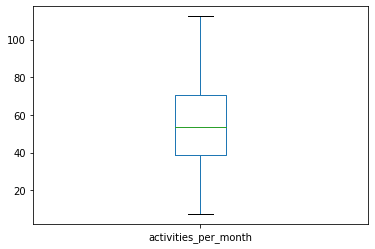

In [195]:
hubs['activities_per_month'].plot.box()

''

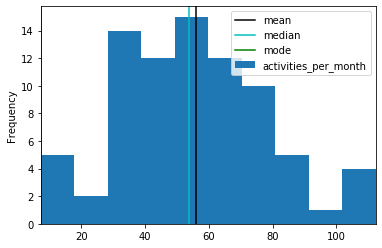

In [177]:
hubs['activities_per_month'].plot.hist()
plt.xlim(hubs['activities_per_month'].min(), hubs['activities_per_month'].max())

plt.axvline(hubs['activities_per_month'].mean(), c='k', label = 'mean')
plt.axvline(hubs['activities_per_month'].median(), c='c', label = 'median')
plt.axvline(hubs['activities_per_month'].mode()[0], c='g', label = 'mode')

plt.legend()
;

In [194]:
# no outliers, normal looking distribution?
# going to go with mean for the average

hubs['mean_act_per_month'] = hubs['activities_per_month'].mean()
hubs['active'] = hubs['activities_per_month'].apply(lambda x: \
                                                    'above average' if x >= hubs['activities_per_month'].mean()\
                                                    else 'below average')
hubs

,activity_count,month_count,activities_per_month,mean_act_per_month,active
HubRandomID,,,,,
10011,974,32,30.437500,55.869514,below average
10549,1145,30,38.166667,55.869514,below average
10813,2166,32,67.687500,55.869514,above average
10833,3255,48,67.812500,55.869514,above average
10884,3537,46,76.891304,55.869514,above average
10932,37,5,7.400000,55.869514,below average
11098,4283,47,91.127660,55.869514,above average
11188,2674,46,58.130435,55.869514,above average
11227,3234,47,68.808511,55.869514,above average


## Engaged
Participants per activity.  
Feed Patrick's data into this.

In [201]:
internal['participants'] = internal['ChildParticipants'] + internal['AdultParticipants']
internal.head()

,HubRandomID,Hub_ActivityID,ActivityDate,activity_date,ProgrammeCategoryID,CategoryName,ProgrammeID,ProgrammeName,ChildParticipants,AdultParticipants,yyyy-mm-dd,participants
0,15994,259,4/3/19,2019-04-03,1,Programmed Activities,50,Playgroups and Early Years,11,7,19-3-01,18
1,15994,260,25/2/19,2019-02-25,1,Programmed Activities,50,Playgroups and Early Years,12,8,19-2-01,20
2,15994,261,11/3/19,2019-11-03,1,Programmed Activities,50,Playgroups and Early Years,0,0,19-3-01,0
3,15994,262,18/3/19,2019-03-18,1,Programmed Activities,50,Playgroups and Early Years,12,8,19-3-01,20
4,15994,263,4/2/19,2019-04-02,1,Programmed Activities,50,Playgroups and Early Years,10,6,19-2-01,16


In [217]:
part_desc = internal.loc[internal['participants'] > 0, 'participants'].describe()
part_desc

count    65384.000000
mean        24.382020
std         55.091921
min          1.000000
25%          6.000000
50%         12.000000
75%         24.000000
max       3500.000000
Name: participants, dtype: float64

In [225]:
# check for outliers
# get IQR
iqr = (part_desc.iloc[6] - part_desc.iloc[4]) *1.5

lower_outlier = part_desc.iloc[4] - iqr
upper_outlier = part_desc.iloc[6] + iqr
print(lower_outlier, upper_outlier)
### upper outliers


# upper outlier description
internal.loc[internal['participants'] > 51, 'participants'].describe()

-21.0 51.0


count    5655.000000
mean      133.828117
std       143.852730
min        52.000000
25%        66.000000
50%        91.000000
75%       140.000000
max      3500.000000
Name: participants, dtype: float64

In [228]:
hubs['sum_participants'] = internal.pivot_table(values=['participants'], index = ['HubRandomID'],\
                            aggfunc=sum)
hubs['part_per_act'] = hubs['sum_participants'] / hubs['activity_count']
hubs.head()

,activity_count,month_count,activities_per_month,mean_act_per_month,active,sum_participants,part_per_act
HubRandomID,,,,,,,
10011,974,32,30.437500,55.869514,below average,3727,3.826489
10549,1145,30,38.166667,55.869514,below average,4866,4.249782
10813,2166,32,67.687500,55.869514,above average,23706,10.944598
10833,3255,48,67.812500,55.869514,above average,59175,18.179724
10884,3537,46,76.891304,55.869514,above average,35896,10.148714


''

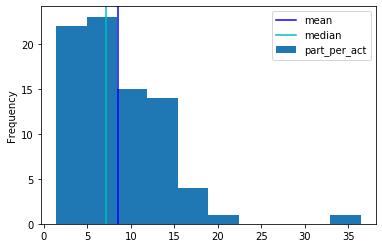

In [236]:
hubs['part_per_act'].plot.hist()
plt.axvline(hubs['part_per_act'].mean(), c = 'b', label='mean')
plt.axvline(hubs['part_per_act'].median(), c = 'c', label='median')
plt.legend()
;

''

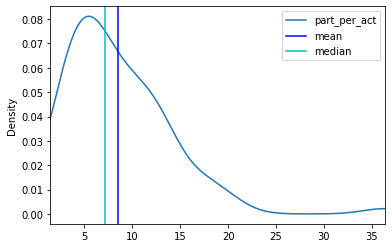

In [238]:
hubs['part_per_act'].plot.kde()
plt.xlim(hubs['part_per_act'].min(), hubs['part_per_act'].max())

plt.axvline(hubs['part_per_act'].mean(), c = 'b', label='mean')
plt.axvline(hubs['part_per_act'].median(), c = 'c', label='median')
plt.legend()
;

In [243]:
# use median to get average

hubs['median_part_per_act'] = hubs['part_per_act'].median()
hubs['engaged'] = hubs['part_per_act'].apply(lambda x: \
                                                    'above average' if x >= hubs['part_per_act'].median()\
                                                    else 'below average')
hubs.head(20)


,activity_count,month_count,activities_per_month,mean_act_per_month,active,sum_participants,part_per_act,median_part_per_act,engaged
HubRandomID,,,,,,,,,
10011,974,32,30.437500,55.869514,below average,3727,3.826489,7.175519,below average
10549,1145,30,38.166667,55.869514,below average,4866,4.249782,7.175519,below average
10813,2166,32,67.687500,55.869514,above average,23706,10.944598,7.175519,above average
10833,3255,48,67.812500,55.869514,above average,59175,18.179724,7.175519,above average
10884,3537,46,76.891304,55.869514,above average,35896,10.148714,7.175519,above average
10932,37,5,7.400000,55.869514,below average,53,1.432432,7.175519,below average
11098,4283,47,91.127660,55.869514,above average,57782,13.491011,7.175519,above average
11188,2674,46,58.130435,55.869514,above average,34033,12.727375,7.175519,above average
11227,3234,47,68.808511,55.869514,above average,36061,11.150588,7.175519,above average


## Diversity of Programs

## Need to nut out the definition and how I'm measuring it

In [247]:
# get count of distinct programmes each hub offers

hubs['distinct_programmes'] = internal.pivot_table(values = 'ProgrammeName', index = 'HubRandomID', \
                     aggfunc = lambda x: x.unique().shape[0])
hubs.head()

,activity_count,month_count,activities_per_month,mean_act_per_month,active,sum_participants,part_per_act,median_part_per_act,engaged,distinct_programmes
HubRandomID,,,,,,,,,,
10011,974,32,30.437500,55.869514,below average,3727,3.826489,7.175519,below average,25
10549,1145,30,38.166667,55.869514,below average,4866,4.249782,7.175519,below average,21
10813,2166,32,67.687500,55.869514,above average,23706,10.944598,7.175519,above average,23
10833,3255,48,67.812500,55.869514,above average,59175,18.179724,7.175519,above average,25
10884,3537,46,76.891304,55.869514,above average,35896,10.148714,7.175519,above average,24


In [271]:
# get count of activities under each programme for each hub
# turn programme names from rows to columns
# drop multi-index

programme_counts = internal.pivot_table(values = 'Hub_ActivityID', index = ['HubRandomID', 'ProgrammeName'], aggfunc = len)\
                    .unstack()\
                    .droplevel(0, axis=1)

programme_counts.head()

ProgrammeName,Accommodation,Adults,Children,Children's Language & Literacy programs,Community Events,Community Health Services,Domestic/Family violence,Early intervention,Education and training,Emergency aid,English Classes & Conversation Programs,Family support,Financial counselling,Formal Training,GP/Doctors,Healthy Lifestyle programs,Informal Training,Maternal & Child Health,Meetings,Migrant resource or settlement,Network Meetings,Number of families participating in the Hub,Other,Parent engagement,Participants who gained employment,Playgroups and Early Years,Preschool,School Events,Volunteering
HubRandomID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10011,10.0,1.0,NaN,NaN,NaN,21.0,10.0,31.0,85.0,10.0,8.0,11.0,10.0,54.0,10.0,11.0,34.0,21.0,2.0,10.0,1.0,85.0,10.0,294.0,11.0,148.0,63.0,23.0,NaN
10549,41.0,NaN,NaN,NaN,NaN,20.0,61.0,20.0,64.0,20.0,185.0,73.0,42.0,1.0,20.0,15.0,1.0,29.0,NaN,43.0,NaN,74.0,32.0,77.0,NaN,231.0,64.0,NaN,32.0
10813,32.0,NaN,NaN,174.0,NaN,64.0,85.0,85.0,64.0,64.0,43.0,85.0,85.0,55.0,74.0,184.0,17.0,64.0,NaN,75.0,NaN,85.0,20.0,459.0,1.0,266.0,64.0,NaN,21.0
10833,10.0,39.0,NaN,266.0,NaN,93.0,62.0,21.0,63.0,29.0,106.0,105.0,31.0,63.0,10.0,984.0,117.0,116.0,10.0,84.0,NaN,145.0,20.0,282.0,11.0,423.0,74.0,NaN,91.0
10884,29.0,10.0,NaN,408.0,NaN,86.0,72.0,10.0,64.0,40.0,241.0,94.0,42.0,354.0,20.0,306.0,41.0,20.0,NaN,20.0,NaN,153.0,131.0,638.0,43.0,563.0,32.0,NaN,120.0


In [273]:
# get average activities per program

cols = programme_counts.columns

avg_prog_counts = {}

for col in cols:
    avg = programme_counts[col].median()
    avg_prog_counts[col] = avg
    
avg_prog_counts

{'Accommodation': 20.0,
 'Adults': 10.0,
 'Children': 11.0,
 "Children's Language & Literacy programs": 62.0,
 'Community Events': 1.0,
 'Community Health Services': 40.0,
 'Domestic/Family violence': 31.0,
 'Early intervention': 31.0,
 'Education and training': 64.0,
 'Emergency aid': 22.0,
 'English Classes & Conversation Programs': 121.0,
 'Family support': 73.0,
 'Financial counselling': 21.5,
 'Formal Training': 63.0,
 'GP/Doctors': 31.0,
 'Healthy Lifestyle programs': 189.0,
 'Informal Training': 61.0,
 'Maternal & Child Health': 30.0,
 'Meetings': 10.0,
 'Migrant resource or settlement': 32.0,
 'Network Meetings': 2.5,
 'Number of families participating in the Hub': 97.0,
 'Other': 23.0,
 'Parent engagement': 328.0,
 'Participants who gained employment': 24.5,
 'Playgroups and Early Years': 201.0,
 'Preschool': 37.0,
 'School Events': 3.0,
 'Volunteering': 108.0}

In [314]:
test = internal.pivot_table(values = 'Hub_ActivityID', index = ['HubRandomID', 'ProgrammeName'], aggfunc = len)

# average no of products per user order



prog_counts_per_hub = pd.DataFrame(internal.groupby(['HubRandomID','ProgrammeName'])['Hub_ActivityID'].count()).reset_index()
prog_counts_per_hub.rename({'Hub_ActivityID' : 'prog_counts_per_hub'}, axis = 1, inplace=True)

prog_counts_per_hub

,HubRandomID,ProgrammeName,prog_counts_per_hub
0,10011,Accommodation,10
1,10011,Adults,1
2,10011,Community Health Services,21
3,10011,Domestic/Family violence,10
4,10011,Early intervention,31
5,10011,Education and training,85
6,10011,Emergency aid,10
7,10011,English Classes & Conversation Programs,8
8,10011,Family support,11
9,10011,Financial counselling,10


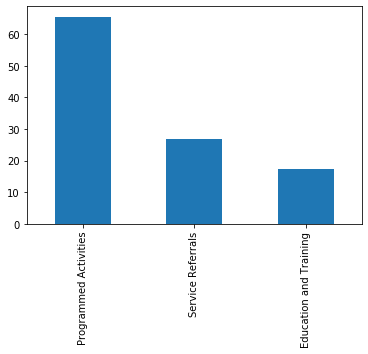

In [325]:
# need to nut out metric for this
# include

(internal.loc[internal['HubRandomID'] == 15994, 'ProgrammeName'].value_counts(normalize=True)*100).plot.bar();


(internal.loc[internal['HubRandomID'] == 15994, 'CategoryName'].value_counts(normalize=True)*100).plot.bar();


In [244]:
internal.head()

,HubRandomID,Hub_ActivityID,ActivityDate,activity_date,ProgrammeCategoryID,CategoryName,ProgrammeID,ProgrammeName,ChildParticipants,AdultParticipants,yyyy-mm-dd,participants
0,15994,259,4/3/19,2019-04-03,1,Programmed Activities,50,Playgroups and Early Years,11,7,19-3-01,18
1,15994,260,25/2/19,2019-02-25,1,Programmed Activities,50,Playgroups and Early Years,12,8,19-2-01,20
2,15994,261,11/3/19,2019-11-03,1,Programmed Activities,50,Playgroups and Early Years,0,0,19-3-01,0
3,15994,262,18/3/19,2019-03-18,1,Programmed Activities,50,Playgroups and Early Years,12,8,19-3-01,20
4,15994,263,4/2/19,2019-04-02,1,Programmed Activities,50,Playgroups and Early Years,10,6,19-2-01,16
